In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_train = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/training_set.xlsx')

In [3]:
data_test = pd.read_csv('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/test.csv')

In [4]:
y_test = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/y_test.xlsx')

In [5]:
data_train.head()

,std,interquartilerange,range,variance,feature
0,1.893093,0.744145,6.10639,3.583801,0
1,12.137999,11.900842,45.21478,147.331026,2
2,3.861983,2.967290,13.48541,14.914914,0
3,2.806293,1.340335,10.49092,7.875282,0
4,4.436192,7.716569,11.91696,19.679798,0


In [6]:
data_test.head()

,time_stamp,ori,Unnamed: 2,Unnamed: 3
0,1582892149513,183.32074,-23.296076,-8.208767
1,1582892149530,183.43580,-23.217299,-8.004543
2,1582892149550,183.55615,-22.962630,-7.778291
3,1582892149570,183.67781,-22.410380,-7.610994
4,1582892149588,183.78986,-22.059351,-7.418176


In [7]:
x_train = data_train.drop('feature', axis=1)

In [8]:
x_train

,std,interquartilerange,range,variance
0,1.893093,0.744145,6.10639,3.583801
1,12.137999,11.900842,45.21478,147.331026
2,3.861983,2.967290,13.48541,14.914914
3,2.806293,1.340335,10.49092,7.875282
4,4.436192,7.716569,11.91696,19.679798
...,...,...,...,...
71,1.828021,2.107568,6.60469,3.341661
72,7.065546,8.328740,26.64837,49.921942
73,3.707785,1.591082,13.11209,13.747673
74,4.342830,3.536580,11.63962,18.860171


In [9]:
y_train = data_train['feature']

In [10]:
y_train

0     0
1     2
2     0
3     0
4     0
     ..
71    0
72    1
73    0
74    0
75    1
Name: feature, Length: 76, dtype: int64

In [11]:
y_test = y_test['feature']

In [12]:
y_test

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     2
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    2
18    2
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
Name: feature, dtype: int64

In [13]:
# Dividing the data into windows
time_stamp_windows = []

last = len(data_test) // 100

for i in range(last):
    time_stamp_windows.append(data_test.iloc[i*100:i*100+100]['time_stamp'])
    
time_stamp_windows.append(data_test.iloc[last*100:-1]['time_stamp'])

In [14]:
# Dividing the data 'ori' column into windows
windows = []

last = len(data_test) // 100

for i in range(last):
    windows.append(data_test.iloc[i*100:i*100+100]['ori'])
    
windows.append(data_test.iloc[last*100:-1]['ori'])

In [15]:
windows[0]

0     183.32074
1     183.43580
2     183.55615
3     183.67781
4     183.78986
        ...    
95    184.67595
96    184.57660
97    184.57419
98    184.55563
99    184.61390
Name: ori, Length: 100, dtype: float64

In [16]:
firstquart = []
secondquart = []
thirdquart = []
for var in windows: 
    var1quart = var.quantile(.25)
    var2quart = var.quantile(.5)
    var3quart = var.quantile(.75)
    firstquart.append(var1quart.transpose())
    secondquart.append(var2quart.transpose())
    thirdquart.append(var2quart.transpose())
    

In [17]:
i=1
for x in windows:
    y=x
    y.to_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/data_test_window/window'+str(i)+'.xlsx')
    y = x.describe()
    y['interquartilerange'] = thirdquart[i-1] - firstquart[i-1]
    y['range'] = y['max'] - y['min']
    y['variance'] = y['std']**2
    y.to_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/data_test_feature/feature'+str(i)+'.xlsx')
    i+=1


In [18]:
y

count                  46.000000
mean                  247.547621
std                     0.373976
min                   246.874150
25%                   247.114370
50%                   247.742180
75%                   247.821240
max                   248.027100
interquartilerange      0.627810
range                   1.152950
variance                0.139858
Name: ori, dtype: float64

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
predictions = []
for i in range(1,len(windows)+1):
    df = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/data_test_feature/feature'+str(i)+'.xlsx')
    dff = pd.DataFrame(pd.Series({'std':df.loc[2,'ori'],'interquartilerange':df.loc[8,'ori'],'range':df.loc[9,'ori'], 'variance':df.loc[10,'ori']}))
    x_test=dff.transpose()
    #df.drop([0,1,3,4,5,6,7],inplace=True) 
    #temp1 = df['ori']
    #x_test = pd.DataFrame(temp1)
    #x_test = np.reshape(temp, (1, -1))
    logmodel = LogisticRegression()
    logmodel.fit(x_train,y_train)
    predictions.append(logmodel.predict(x_test)[0])

/home/surbhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/surbhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/surbhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/surbhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [21]:
#predictions

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.00      0.00      0.00         1
           2       0.50      0.33      0.40         3

    accuracy                           0.88        33
   macro avg       0.50      0.43      0.46        33
weighted avg       0.92      0.88      0.90        33



In [55]:
print(confusion_matrix(y_test,predictions))

[[28  1]
 [ 0  4]]


In [56]:
marker = ['N']*len(windows)

In [57]:
j =0
for i in predictions:
    if i == 1:
        marker[j] = 'LT'
    if i == 2:
        marker[j] = 'RT'
    j=j+1
    

In [58]:
font_dict = {'family':'serif', 'color':'darkred', 'size':15 }

NameError: name 'marker' is not defined

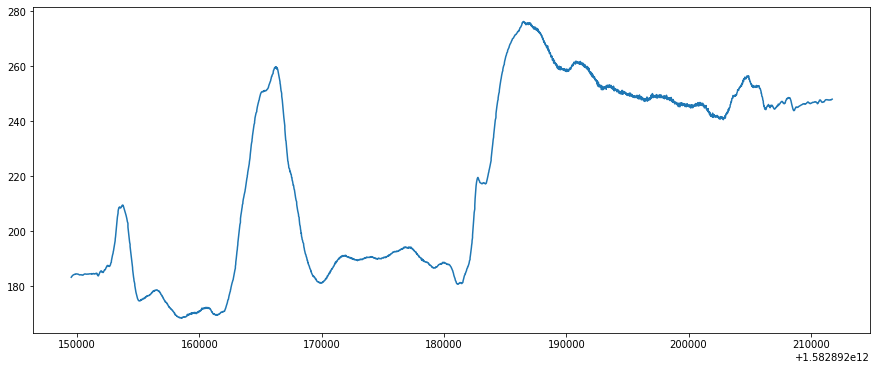

In [24]:
plt.figure(figsize = (15,6))
plt.plot(data_test['time_stamp'], data_test['ori'])
for i in range(len(marker)):
    plt.text(time_stamp_windows[i].iloc[0]+50, 200, marker[i], fontdict = font_dict)
plt.show()